In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers

In [5]:
import matplotlib.pyplot as plt

In [11]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test/255.0
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
print("Training data Shape: ",X_train.shape)
print("Testing data Shape: ",X_test.shape)

Training data Shape:  (60000, 784)
Testing data Shape:  (10000, 784)


In [22]:
model = keras.Sequential([
    layers.Dense(128,activation = 'relu',input_shape = (784,)),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')            
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    X_train,y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.1,
    verbose = 1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9040 - loss: 0.3365 - val_accuracy: 0.9623 - val_loss: 0.1355
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.1344 - val_accuracy: 0.9698 - val_loss: 0.1023
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0928 - val_accuracy: 0.9672 - val_loss: 0.1092
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0690 - val_accuracy: 0.9755 - val_loss: 0.0862
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9772 - val_loss: 0.0795
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0431 - val_accuracy: 0.9787 - val_loss: 0.0736
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0348 - val_accuracy: 0.9768 - val_loss: 0.0865
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0275 - val_accuracy: 0.

In [27]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

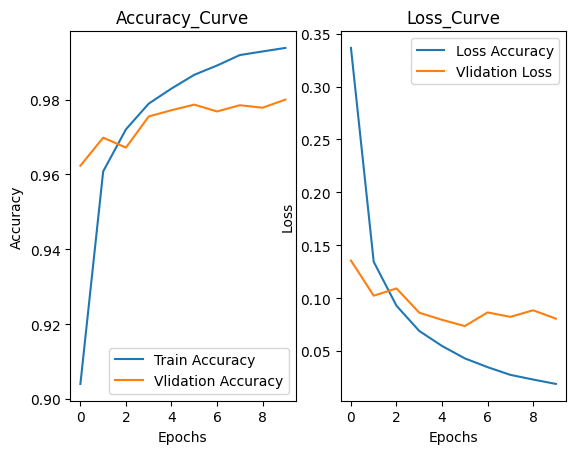

In [28]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = "Train Accuracy")
plt.plot(history.history['val_accuracy'],label = "Vlidation Accuracy")
plt.title("Accuracy_Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = "Loss Accuracy")
plt.plot(history.history['val_loss'],label = "Vlidation Loss")
plt.title("Loss_Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [30]:
test_loss,test_acc = model.evaluate(X_test,y_test,verbose = 0)

In [31]:
print("Test Accuracy",test_acc)
print("Test Loss",test_loss)

Test Accuracy 0.9772999882698059
Test Loss 0.07651746273040771
